In [15]:
import numpy as np
import pandas as pd
import os
import copy

In [16]:
ALL_MODELS = ["openai-community/gpt2", "openai-community/gpt2-medium", "openai-community/gpt2-large"] +\
    ["openai-community/gpt2-xl", "meta-llama/Llama-3.2-1B", "meta-llama/Llama-3.2-3B", "allenai/OLMo-2-0425-1B", "google/gemma-2-2b"] +\
    ["allenai/OLMo-2-1124-7B", "allenai/OLMo-2-1124-13B", "google/gemma-2-9b"]

SMALL_MODELS = ["openai-community/gpt2", "openai-community/gpt2-medium", "openai-community/gpt2-large"] +\
    ["openai-community/gpt2-xl", "meta-llama/Llama-3.2-1B", "allenai/OLMo-2-0425-1B",]

BIG_MODELS = ["meta-llama/Llama-3.2-3B", "google/gemma-2-2b"] +\
    ["allenai/OLMo-2-1124-7B", "allenai/OLMo-2-1124-13B", "google/gemma-2-9b"]

PARAM2MODEL = {
    "<1B": ["openai-community/gpt2", "openai-community/gpt2-medium", "openai-community/gpt2-large"],
    "1B-2B": ["openai-community/gpt2-xl", "meta-llama/Llama-3.2-1B", "allenai/OLMo-2-0425-1B"],
    "2B-5B": ["google/gemma-2-2b", "meta-llama/Llama-3.2-3B"],
    "5B+": ["allenai/OLMo-2-1124-7B", "google/gemma-2-9b", "allenai/OLMo-2-1124-13B",],
}

STEP = [150, 1000, 5000, 10000, 25000, 50000, 99000, 250000, 500000, 928000]

CONDITIONS = ["Linear_Representation", "PC", "Probability", "Random"]

In [17]:
def process_shades_results(data, condition):

    if condition != "Probability":
        best_acc = -np.inf
        grp_data = data.groupby("layer")
        for _, grp in grp_data:
            mean_acc = np.mean(grp["accuracy"])
            if mean_acc > best_acc:
                best_acc = mean_acc
        return mean_acc
    else:
        return np.mean(data["accuracy"])

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# DF to hold all of the classification results

df = {
    "Dataset": [],
    "Comparison": [],
    "Accuracy": [],
    "Model": [],
    "Condition": [],
}
# Add Shades dataset
comparisons = [
    "probable_improbable",
    "probable_impossible",
    "probable_inconceivable",
    "improbable_impossible",
    "improbable_inconceivable",
    "impossible_inconceivable"
    ]

for model in ALL_MODELS:
    for condition in CONDITIONS:
        for comparison in comparisons:
            path = os.path.join("../results", model, "Linear_Representation", condition, comparison + ".csv")
            mean_acc = process_shades_results(pd.read_csv(path), condition)
            df["Dataset"].append("Shades")
            df["Comparison"].append(comparison)
            df["Accuracy"].append(mean_acc)
            df["Model"].append(model)
            df["Condition"].append(condition)

# Add goulding dataset
for model in ALL_MODELS:
    for condition in CONDITIONS:
        path = os.path.join("../results", model, "Classification", "goulding", "data", condition + ".csv")
        data = pd.read_csv(path)

        for _, row in data.iterrows():
            df["Dataset"].append("Goulding")
            df["Comparison"].append(row["comparison"])
            df["Accuracy"].append(row["accuracy"])
            df["Model"].append(model)
            df["Condition"].append(condition)

# Add DTFIT dataset
for model in ALL_MODELS:
    for condition in CONDITIONS:
        path = os.path.join("../results", model, "Classification", "kauf", "DTFit_data", condition + ".csv")
        data = pd.read_csv(path)

        for _, row in data.iterrows():
            df["Dataset"].append("Kauf-2")
            df["Comparison"].append(row["comparison"])
            df["Accuracy"].append(row["accuracy"])
            df["Model"].append(model)
            df["Condition"].append(condition)

# Add EventsAdapt dataset
for model in ALL_MODELS:
    for condition in CONDITIONS:
        path = os.path.join("../results", model, "Classification", "kauf", "EventsAdapt_data", condition + ".csv")
        data = pd.read_csv(path)

        for _, row in data.iterrows():
            df["Dataset"].append("Kauf-1")
            df["Comparison"].append(row["comparison"])
            df["Accuracy"].append(row["accuracy"])
            df["Model"].append(model)
            df["Condition"].append(condition)

# Add EventsRev dataset
for model in ALL_MODELS:
    for condition in CONDITIONS:
        path = os.path.join("../results", model, "Classification", "kauf", "EventsRev_data", condition + ".csv")
        data = pd.read_csv(path)

        for _, row in data.iterrows():
            df["Dataset"].append("Kauf-3")
            df["Comparison"].append(row["comparison"])
            df["Accuracy"].append(row["accuracy"])
            df["Model"].append(model)
            df["Condition"].append(condition)

# Full comparison contains metadata from Vega Mendoza
df["Full Comparison"] = copy.deepcopy(df["Comparison"])
# Add Vega-Mendoza dataset
for model in ALL_MODELS:
    for condition in CONDITIONS:
        path = os.path.join("../results", model, "Classification", "vega_mendoza", "data", condition + ".csv")
        data = pd.read_csv(path)

        for _, row in data.iterrows():
            df["Dataset"].append("Vega-Mendoza")
            if row["comparison"] in ["probable_improbable_unrelated", "probable_improbable_related"]:
                comparison = "probable_improbable"
            elif row["comparison"] in ["probable_inconceivable_unrelated", "probable_inconceivable_related"]:
                comparison = "probable_inconceivable"
            elif row["comparison"] in ["improbable_unrelated_inconceivable_unrelated", "improbable_unrelated_inconceivable_related",
                                    "improbable_related_inconceivable_unrelated", "improbable_related_inconceivable_related"
                                    ]:
                comparison = "improbable_inconceivable"
            else:
                print(row["comparison"])

            df["Comparison"].append(comparison)
            df["Full Comparison"].append(row["comparison"])
            df["Accuracy"].append(row["accuracy"])
            df["Model"].append(model)
            df["Condition"].append(condition)

# Turn it into a dataframe
df = pd.DataFrame.from_dict(df)

In [20]:
# Inspect
df[df["Condition"] == "Probability"].head()

,Dataset,Comparison,Accuracy,Model,Condition,Full Comparison
12,Shades,probable_improbable,0.800000,openai-community/gpt2,Probability,probable_improbable
13,Shades,probable_impossible,0.871429,openai-community/gpt2,Probability,probable_impossible
14,Shades,probable_inconceivable,0.942857,openai-community/gpt2,Probability,probable_inconceivable
15,Shades,improbable_impossible,0.771429,openai-community/gpt2,Probability,improbable_impossible
16,Shades,improbable_inconceivable,0.957143,openai-community/gpt2,Probability,improbable_inconceivable


<Figure size 800x800 with 0 Axes>

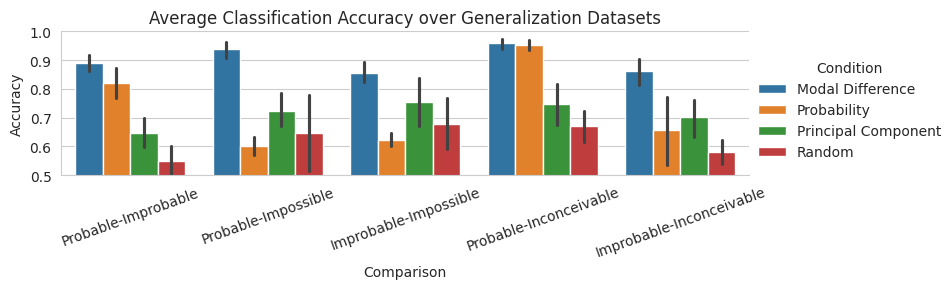

In [22]:
### Plot average over all generalization dataset for each comparison
sns.set_style("whitegrid")
plt.figure(figsize=(8, 8))

# Subselect just models >= 2B
big_df = df[df["Model"].isin(BIG_MODELS)]
# Plot Generalization Datasets
big_df = big_df[big_df["Dataset"] != "Shades"]

hue_order = ["Linear_Representation", "Probability", "PC", "Random"]
g = sns.catplot(data=big_df, x="Comparison", y="Accuracy", hue="Condition", kind="bar", height=3, aspect=2, hue_order=hue_order)
g._legend.set_bbox_to_anchor((.925, .8))
g._legend.set_loc('upper left')
g._legend.get_texts()[0].set_text('Modal Difference') 
g._legend.get_texts()[2].set_text('Principal Component') 

plt.xticks(rotation=20)
plt.title("Average Classification Accuracy over Generalization Datasets")
plt.xticks(ticks=range(5), labels=["Probable-Improbable", "Probable-Impossible", "Improbable-Impossible", "Probable-Inconceivable", "Improbable-Inconceivable"])
plt.ylim(.5, 1)
plt.tight_layout()  # Adjust layout to avoid clipping
plt.savefig("../Figures/Study1_CLF.pdf", format="pdf", bbox_inches="tight")
plt.show()

<Figure size 800x800 with 0 Axes>

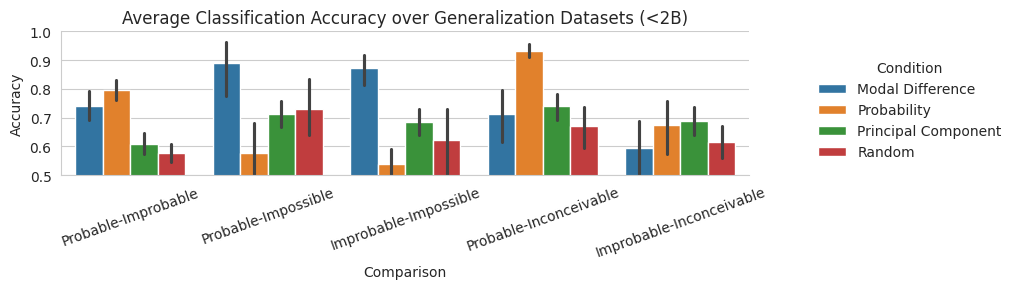

In [23]:
### Plot average over all generalization dataset for each comparison
plt.figure(figsize=(8, 8))

# Subselect models <2B
small_df = df[df["Model"].isin(SMALL_MODELS)]
# Plot Generalization Datasets
small_df = small_df[small_df["Dataset"] != "Shades"]

hue_order = ["Linear_Representation", "Probability", "PC", "Random"]
g = sns.catplot(data=small_df, x="Comparison", y="Accuracy", hue="Condition", kind="bar", height=3, aspect=2, hue_order=hue_order)
g._legend.set_bbox_to_anchor((1, .8))
g._legend.set_loc('upper left')
g._legend.get_texts()[0].set_text('Modal Difference') 
g._legend.get_texts()[2].set_text('Principal Component') 

plt.xticks(rotation=20)
plt.title("Average Classification Accuracy over Generalization Datasets (<2B)")
plt.xticks(ticks=range(5), labels=["Probable-Improbable", "Probable-Impossible", "Improbable-Impossible", "Probable-Inconceivable", "Improbable-Inconceivable"])
plt.ylim(.5, 1)
plt.tight_layout()  # Adjust layout to avoid clipping
plt.savefig("../Figures/Study1_CLF_Less2B.pdf", format="pdf", bbox_inches="tight")
plt.show()

<Figure size 640x480 with 0 Axes>

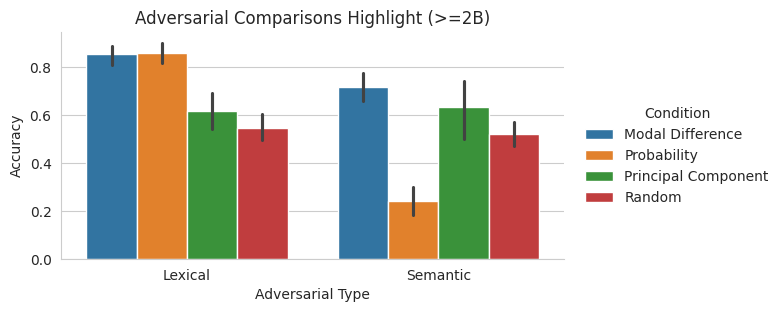

In [24]:
### Highlight Adversarial Stimuli
sns.set_style("whitegrid")
plt.figure()

# Subselect big models
big_df = df[df["Model"].isin(BIG_MODELS)]
# Pick out Adversarial Stimuli
adversarial_df = big_df[big_df["Dataset"].isin(["Vega-Mendoza", "Kauf-1", "Kauf-2"])]
adversarial_df = adversarial_df[adversarial_df["Full Comparison"].isin(["improbable_unrelated_inconceivable_related", "probable_improbable", "probable_inconceivable"])]

comparison_maps = {'improbable_unrelated_inconceivable_related': 'Semantic', 'probable_improbable': 'Lexical', 'probable_inconceivable': 'Lexical'}
adversarial_df['Adversarial Type'] = adversarial_df['Full Comparison'].map(comparison_maps)

hue_order = ["Linear_Representation", "Probability", "PC", "Random"]
g = sns.catplot(data=adversarial_df, x="Adversarial Type", y="Accuracy", hue="Condition", kind="bar", height=3, aspect=2, hue_order=hue_order)
g._legend.get_texts()[0].set_text('Modal Difference') 
g._legend.get_texts()[2].set_text('Principal Component')
plt.title("Adversarial Comparisons Highlight (>=2B)")
plt.savefig("../Figures/Study1_Adversarial_CLFs.pdf", format="pdf", bbox_inches="tight")
plt.show()

## Development of Modal Difference Vectors

In [25]:
colors = {
    'Probable-Inconceivable': 'red',
    'Improbable-Inconceivable': 'orange',
    'Impossible-Inconceivable': 'gold',
    'Probable-Impossible': 'green',
    'Probable-Improbable': 'blue',
    'Improbable-Impossible': 'purple',
}

comparison_map = {
    'probable_inconceivable': 'Probable-Inconceivable',
    'improbable_inconceivable': 'Improbable-Inconceivable',
    'impossible_inconceivable': 'Impossible-Inconceivable',
    'probable_impossible': 'Probable-Impossible',
    'probable_improbable': 'Probable-Improbable',
    'improbable_impossible': 'Improbable-Impossible',
}


In [26]:
## Gather data for concept development through training

training_df = {
    "Comparison": [],
    "Accuracy": [],
    "Step": [],
}
# Add Shades dataset
comparisons = [
    "probable_improbable",
    "probable_impossible",
    "probable_inconceivable",
    "improbable_impossible",
    "improbable_inconceivable",
    "impossible_inconceivable"
    ]

for step in STEP:
    for comparison in comparisons:
        path = os.path.join("../results", "allenai/OLMo-2-1124-7B", "Training_Analysis", str(step), "Linear_Representation", comparison + ".csv")
        mean_acc = process_shades_results(pd.read_csv(path), condition)
        training_df["Step"].append(step)
        training_df["Comparison"].append(comparison)
        training_df["Accuracy"].append(mean_acc)



# Turn it into a dataframe
training_df = pd.DataFrame.from_dict(training_df)
training_df["Comparison"] = training_df["Comparison"].map(comparison_map)
training_df["Log(Step)"] = np.log(training_df["Step"])

In [27]:
# Gather data for concepts over layers

layer_df = {
    "Comparison": [],
    "Accuracy": [],
    "Model": [],
    "Layer": []
}
# Add Shades dataset
comparisons = [
    "probable_improbable",
    "probable_impossible",
    "probable_inconceivable",
    "improbable_impossible",
    "improbable_inconceivable",
    "impossible_inconceivable"
    ]

for model in BIG_MODELS:
    for comparison in comparisons:
        path = os.path.join("../results", model, "Linear_Representation", "Linear_Representation", comparison + ".csv")
        data = pd.read_csv(path)
        max_layer = data["layer"].max()
        for _, row in data.iterrows():
            if row["layer"] == 0:
                continue
            layer_df["Comparison"].append(comparison)
            layer_df["Accuracy"].append(row["accuracy"])
            layer_df["Layer"].append(row["layer"]/max_layer)
            layer_df["Model"].append(model)

# Turn it into a dataframe
layer_df = pd.DataFrame.from_dict(layer_df)
layer_df["Comparison"] = layer_df["Comparison"].map(comparison_map)

/tmp/ipykernel_3028957/1140726785.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  linear_representations["Comparison"] = linear_representations["Comparison"].map(comparison_map)
/tmp/ipykernel_3028957/1140726785.py:36: UserWarning: 
The markers list has fewer values (1) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=training_df, x="Step", y="Accuracy", hue="Comparison", style="Comparison", errorbar="ci", err_style="band", markers="o", dashes=False, palette=colors, legend=False, ax=axs[1, 0])


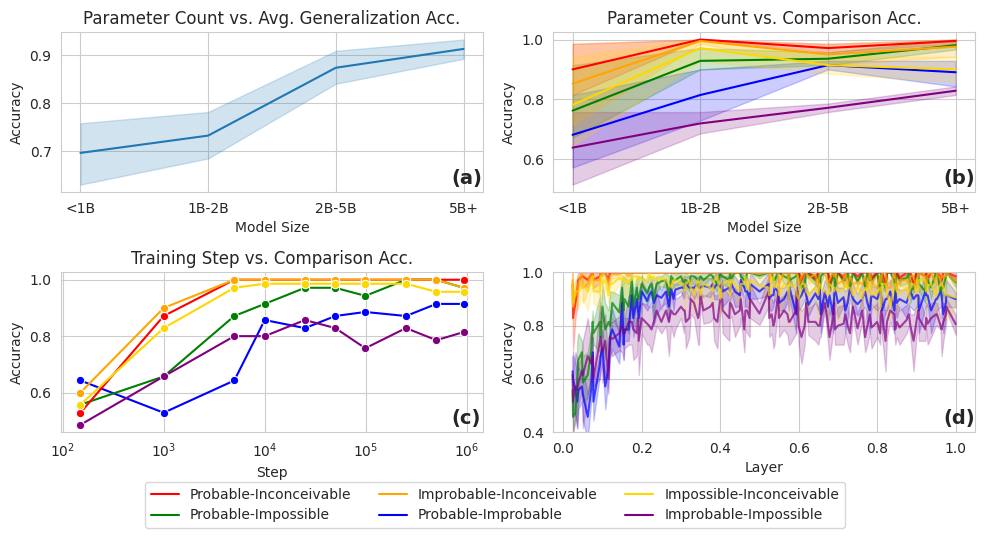

In [28]:
fig, axs = plt.subplots(2, 2, figsize=(10, 5))

#### Plot Size to Performance Comparison ####
models = df["Model"]
size = []
for model in models:
    for bucket, model_list in PARAM2MODEL.items():
        if model in model_list:
            size.append(bucket)
df["Model Size"] = size

linear_representations = df[df["Condition"] == "Linear_Representation"]
sns.lineplot(data=linear_representations[linear_representations["Dataset"] != "Shades"], x="Model Size", y="Accuracy", errorbar="ci", err_style="band", ax=axs[0, 0])
# Move legend outside the plot
axs[0, 0].set_title("Parameter Count vs. Avg. Generalization Acc.")
axs[0, 0].annotate("(a)", xy=(0.925, 0.05), xycoords='axes fraction', fontsize=14, fontweight='bold')


#### Plot Size to Performance Comparison ####
models = df["Model"]
size = []
for model in models:
    for bucket, model_list in PARAM2MODEL.items():
        if model in model_list:
            size.append(bucket)
df["Model Size"] = size

linear_representations = df[df["Condition"] == "Linear_Representation"]

linear_representations["Comparison"] = linear_representations["Comparison"].map(comparison_map)
sns.lineplot(data=linear_representations[linear_representations["Dataset"] == "Shades"], x="Model Size", y="Accuracy", hue="Comparison", errorbar="ci",  err_style="band", palette=colors, legend=False, ax=axs[0, 1])
axs[0, 1].set_title("Parameter Count vs. Comparison Acc.")
axs[0, 1].annotate("(b)", xy=(0.925, 0.05), xycoords='axes fraction', fontsize=14, fontweight='bold')

#### Plot Train Step to Performance Comparison ####
sns.lineplot(data=training_df, x="Step", y="Accuracy", hue="Comparison", style="Comparison", errorbar="ci", err_style="band", markers="o", dashes=False, palette=colors, legend=False, ax=axs[1, 0])
axs[1, 0].set_xscale('log')
# Move legend outside the plot
axs[1, 0].set_title("Training Step vs. Comparison Acc.")
axs[1, 0].annotate("(c)", xy=(0.925, 0.05), xycoords='axes fraction', fontsize=14, fontweight='bold')


#### Plot Train Step to Performance Comparison ####
sns.lineplot(data=layer_df, x="Layer", y="Accuracy", hue="Comparison", errorbar="ci", err_style="band", palette=colors, alpha=0.7, legend=False, ax=axs[1, 1])
# Move legend outside the plot
axs[1, 1].set_ylim(0.4, 1.0)
axs[1, 1].set_title("Layer vs. Comparison Acc.")
axs[1, 1].annotate("(d)", xy=(0.925, 0.05), xycoords='axes fraction', fontsize=14, fontweight='bold')

# Create a shared legend
handle_components = [tup for tup in colors.items()]
handles = [plt.Line2D([], [], color=c, label=l) for l, c in handle_components]
labels = [component[0] for component in handle_components]

desired_order = ["Probable-Inconceivable", "Probable-Impossible", "Improbable-Inconceivable", "Probable-Improbable", "Impossible-Inconceivable", "Improbable-Impossible"]
ordered_handles = [handles[labels.index(l)] for l in desired_order]

fig.legend(handles=ordered_handles, labels=desired_order, loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.08))

plt.tight_layout()
plt.savefig("../Figures/Study2.pdf", format="pdf", bbox_inches="tight")